그림을 그린 후 s키를 눌러주세요.
그만두려면 ESC!


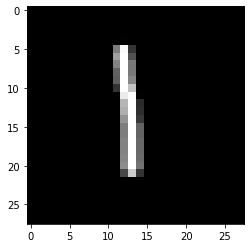

DNN 추론결과 : 1 (p : 1.0)


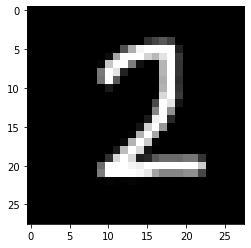

DNN 추론결과 : 2 (p : 1.0)


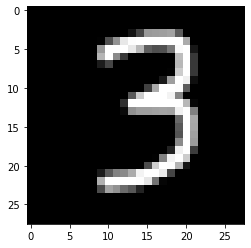

DNN 추론결과 : 3 (p : 1.0)


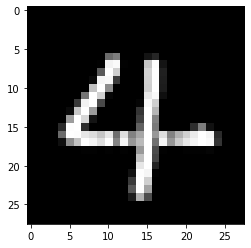

DNN 추론결과 : 4 (p : 1.0)


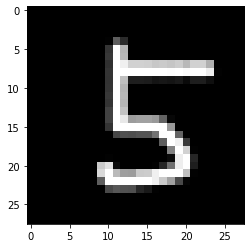

DNN 추론결과 : 5 (p : 1.0)


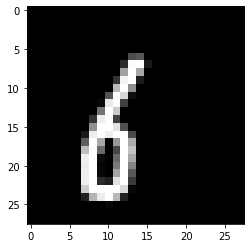

DNN 추론결과 : 8 (p : 1.0)


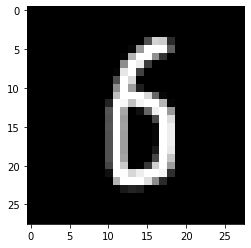

DNN 추론결과 : 6 (p : 1.0)


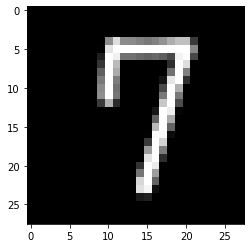

DNN 추론결과 : 7 (p : 1.0)


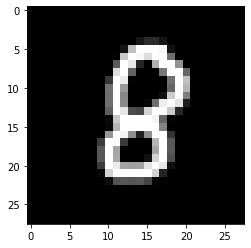

DNN 추론결과 : 8 (p : 1.0)


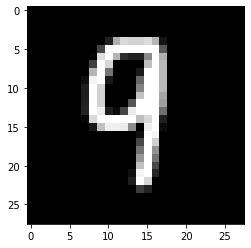

DNN 추론결과 : 9 (p : 0.97)


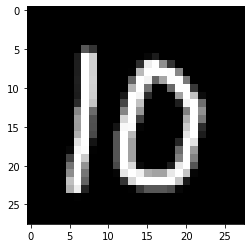

DNN 추론결과 : 0 (p : 0.98)


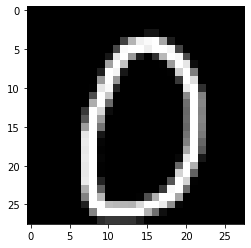

DNN 추론결과 : 0 (p : 1.0)


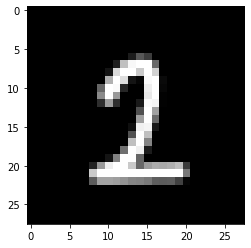

DNN 추론결과 : 1 (p : 0.59)


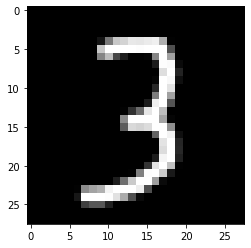

DNN 추론결과 : 3 (p : 1.0)


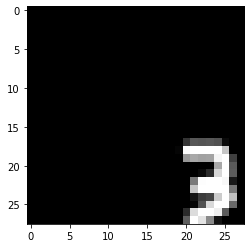

DNN 추론결과 : 3 (p : 1.0)


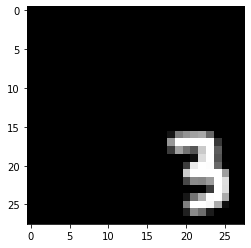

DNN 추론결과 : 5 (p : 1.0)


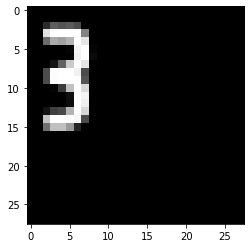

DNN 추론결과 : 4 (p : 1.0)


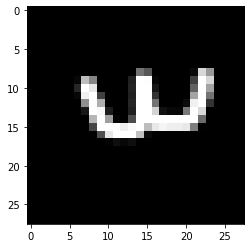

DNN 추론결과 : 4 (p : 0.94)


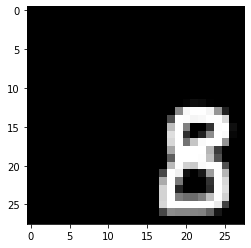

DNN 추론결과 : 3 (p : 0.51)


In [2]:
import cv2
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_dir = "models/mnist_dnn"

#얼굴판별 모델 로드
model_pgu = tf.keras.models.model_from_json(open(model_dir + "/pgu_mnist_model_dnn_json.json").read())
model_pgu.load_weights(model_dir + "/pgu_mnist_model_dnn_weights.h5")
class_names_file = model_dir + "/pgu_mnist_model_dnn_names.json"
with open(class_names_file, "r") as json_file:
    class_names = json.load(json_file)

#마우스로 그리기
click = False
canvas = np.zeros((280, 280))

def onMouse(event, x, y, flags, param):    #마우스 이벤트 처리함수 사용자 정의
    global click
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스를 누른 상태
        click = True 
        cv2.circle(canvas, (x, y), 10, 255, -1)
    elif event == cv2.EVENT_MOUSEMOVE and click == True: #마우스를 누른 상태에서 이동하면
        cv2.circle(canvas, (x, y), 10, 255, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        click = False # 마우스를 때면 상태 변경
        cv2.circle(canvas, (x, y), 10, 255, -1)
    elif event == cv2.EVENT_RBUTTONDOWN: # 마우스를 누른 상태
        cv2.rectangle(canvas, (0, 0), (canvas.shape[1], canvas.shape[0]), 0, -1)
    cv2.imshow("canvas", canvas)
#     print("x : {}, y : {}".format(x, y), end="\r")

def testNumber():
    cv2.imshow("canvas", canvas)
    cv2.setMouseCallback("canvas", onMouse)  #마우스 이벤트 호출

    if cv2.waitKey() == 27:
        cv2.destroyAllWindows()
    elif cv2.waitKey() == ord("s"):
        canvas_resized = cv2.resize(canvas, (28, 28), interpolation=cv2.INTER_AREA)
        canvas_resized_for_predict = np.expand_dims(canvas_resized, axis=0)
        predicted_vector = model_pgu.predict(canvas_resized_for_predict)
        predicted_class = np.argmax(predicted_vector, axis=-1)
        class_no = str(predicted_class).replace("[", "").replace("]", "")
        label = class_names[class_no] + " (p : " + str(round(max(predicted_vector[0]), 2)) + ")"
        cv2.rectangle(canvas, (0, 0), (canvas.shape[1], canvas.shape[0]), 0, -1)
        plt.imshow(canvas_resized, cmap="gray")
        plt.show()
        print("DNN 추론결과 : {}".format(label))
        cv2.destroyAllWindows()
        testNumber()
        
if __name__ == "__main__":
    print("그림을 그린 후 s키를 눌러주세요.")
    print("그만두려면 ESC!")
    testNumber()

In [7]:
dataset = tf.keras.datasets.mnist.load_data()
print(dataset[0][0][0].shape)

(28, 28)
